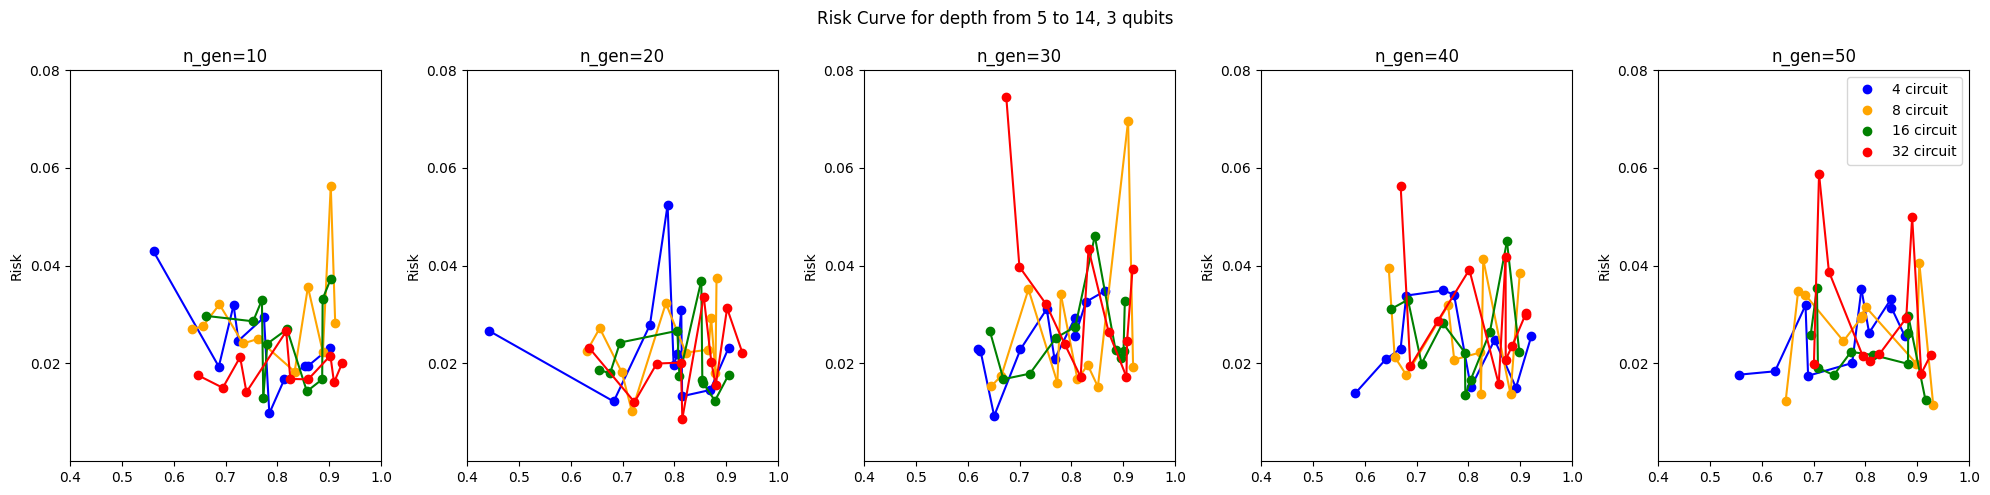

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def indices_for_sorted_order(data_list):
    # Enumerate the list and then sort by the elements, keeping track of the original indices
    sorted_indices = [index for index, value in sorted(enumerate(data_list), key=lambda x: x[1])]
    return sorted_indices

def sort_by_indices(data_list, index_list):
    # Ensure the index list is the same length as the data list
    if len(data_list) != len(index_list):
        raise ValueError("Length of index_list must be the same as length of data_list")

    # Sort the data_list according to the index_list
    sorted_list = [data_list[i] for i in index_list]
    return sorted_list

n = 3
# Load the data
df = pd.read_csv('cost.csv')  # replace with your actual file path

# Filter the data for n = 3
df_filtered = df[df['n'] == n]

# Group by n_circuit, n_gen, and d, and calculate the mean of risk and cost
grouped = df_filtered.groupby(['n_circuit', 'n_gen', 'd'])['cost'].mean().reset_index()

# Get the unique values of n_circuit and n_gen
n_circuit_values = grouped['n_circuit'].unique()
n_gen_values = grouped['n_gen'].unique()

# Plot the average risk and cost curves for each n_circuit and n_gen
fig, axs = plt.subplots(1, len(n_gen_values), figsize=(20, 5))

colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, n_circuit in enumerate(n_circuit_values):
    
    for j, n_gen in enumerate(n_gen_values):
        # Plot cost
        axs[j].set_title(f'n_gen={n_gen}')
        data = grouped[(grouped['n_circuit'] == n_circuit) & (grouped['n_gen'] == n_gen)]
        # axs[i, j].plot(data['cost'], [0]*(len(data['cost'])), label='1-Cost', linestyle = '', marker = 'o')
        
        risks = []
        # Plot risk
        for d in range(5,15):
            # read value by key json
            with open(f'risk_{n}.json') as f:
                risk_data = json.load(f)
            risk = risk_data[f'n={n},d={d},n_circuit={n_circuit},n_gen={n_gen}']
            risks.append(risk)
        x = list((data['cost'] ))
        y = list(np.mean(risks, 1))
        y = sort_by_indices(y, indices_for_sorted_order(x))
        x = sorted(x)
        for k in range(0, len(x) - 1):
            axs[j].plot([x[k],x[k + 1]], [y[k], y[k+1]], color=colors[i])
        axs[j].plot(x, y, label=f'{n_circuit} circuit', linestyle='', marker = 'o', color = colors[i])
        axs[j].set_ylim(0, 0.08)
        axs[j].set_yticks([0.02, 0.04, 0.06, 0.08])
        axs[j].set_xlim(0.4, 1)
        #axs[i, j].fill_between(data['cost'], np.asarray(y) + np.asarray(yvar), np.asarray(y) - np.asarray(yvar), alpha = 0.2, color='r')
        # axs[i, j].legend()
        # axs[i, j].set_xlabel('1 - Cost')
        axs[j].set_ylabel('Risk')
        # for k in range(0, len(x)):
        #     axs[i,j].plot([x[k],x[k]], [0,y[k]], color='black')
        # axs[j].set_yscale('log')
plt.legend()
fig.suptitle(f'Risk Curve for depth from 5 to 14, 3 qubits')
plt.tight_layout()
#plt.savefig('../images/risk_curve2.eps', format='eps')
plt.show()

In [55]:
k = {4: 0.887847221380541}
# If k does not have key 3,8,16,32, add it as existed value
for i in [4,8,16,32]:
    if i not in k:
        k[i] = list(k.values())[0]
print(k)

{4: 0.887847221380541, 8: 0.887847221380541, 16: 0.887847221380541, 32: 0.887847221380541}


C:\Users\haime\AppData\Local\Temp\ipykernel_31724\836344413.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\836344413.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\836344413.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\836344413.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\836344413.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\836344413.py:14: UserWarn

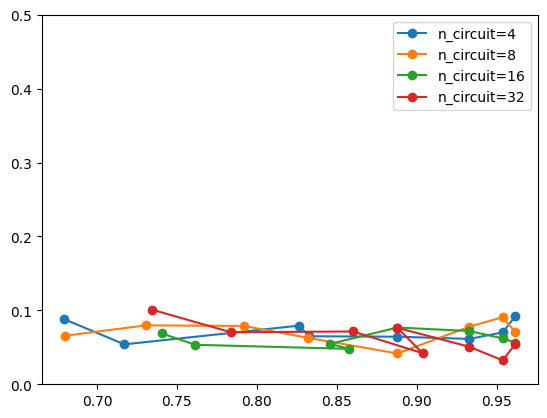

In [67]:
n = 2
n_circuit = 4
for n_circuit in [4,8,16,32]:
    fidelities, risks = [], []
    for d in range(2, 10):
        def add_key(k):
            for i in [4,8,16,32]:
                if i not in k:
                    k[i] = list(k.values())[0]
            return k
        # Load the2 data
        df = pd.read_csv('cost.csv') 
        df_filtered = df[df['n'] == n]
        df_filtered = df_filtered[df['d'] == d]
        df_filtered = df_filtered[df_filtered['cost'] != 0]
        grouped = df_filtered.groupby(['n_circuit',])['cost'].mean().to_dict()
        grouped = add_key(grouped)
        fidelity = grouped[n_circuit]
        fidelities.append(fidelity)
        
        with open(f'risk_{n}.json') as f:
            risk_data = json.load(f)

        filtered_risk_data = {key: value for key, value in risk_data.items() if key.startswith(f'n={n},d={d},n_circuit={n_circuit}')}
        k = []

        for value in filtered_risk_data.values():
            k.append(np.mean(value))
        
        risk = np.mean(k)
        risks.append(risk)

    x = []
    y = []
    for i in range(len(risks)):
        x.append(fidelities[i])
        y.append(risks[i])

    plt.ylim(0, 0.5)        
    plt.plot(x, y, '-o', label=f'n_circuit={n_circuit}')

plt.legend()

# plt.plot(fidelities, risks, label='Risk Curve', linestyle='', marker='o')
plt.show()

C:\Users\haime\AppData\Local\Temp\ipykernel_31724\4048941516.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\4048941516.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

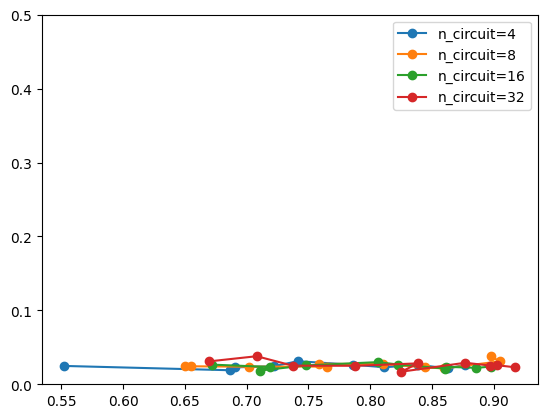

In [68]:
n = 3
n_circuit = 4
for n_circuit in [4,8,16,32]:
    fidelities, risks = [], []
    for d in range(2, 15):
        def add_key(k):
            for i in [4,8,16,32]:
                if i not in k:
                    k[i] = list(k.values())[0]
            return k
        # Load the2 data
        df = pd.read_csv('cost.csv') 
        df_filtered = df[df['n'] == n]
        df_filtered = df_filtered[df['d'] == d]
        df_filtered = df_filtered[df_filtered['cost'] != 0]
        grouped = df_filtered.groupby(['n_circuit',])['cost'].mean().to_dict()
        grouped = add_key(grouped)
        fidelity = grouped[n_circuit]
        fidelities.append(fidelity)
        
        with open(f'risk_{n}.json') as f:
            risk_data = json.load(f)

        filtered_risk_data = {key: value for key, value in risk_data.items() if key.startswith(f'n={n},d={d},n_circuit={n_circuit}')}
        k = []

        for value in filtered_risk_data.values():
            k.append(np.mean(value))
        
        risk = np.mean(k)
        risks.append(risk)

    x = []
    y = []
    for i in range(len(risks)):
        x.append(fidelities[i])
        y.append(risks[i])

    plt.ylim(0, 0.5)        
    plt.plot(x, y, '-o', label=f'n_circuit={n_circuit}')

plt.legend()

# plt.plot(fidelities, risks, label='Risk Curve', linestyle='', marker='o')
plt.show()

C:\Users\haime\AppData\Local\Temp\ipykernel_31724\607629582.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\haime\AppData\Local\Temp\ipykernel_31724\607629582.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df['d'] == d]
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pa

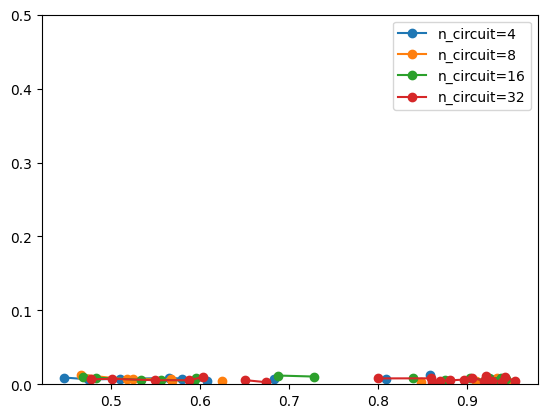

In [70]:
n = 4
n_circuit = 4
for n_circuit in [4,8,16,32]:
    fidelities, risks = [], []
    for d in range(3, 30):
        def add_key(k):
            for i in [4,8,16,32]:
                if i not in k:
                    k[i] = list(k.values())[0]
            return k
        # Load the2 data
        df = pd.read_csv('cost.csv') 
        df_filtered = df[df['n'] == n]
        df_filtered = df_filtered[df['d'] == d]
        df_filtered = df_filtered[df_filtered['cost'] != 0]
        grouped = df_filtered.groupby(['n_circuit',])['cost'].mean().to_dict()
        grouped = add_key(grouped)
        fidelity = grouped[n_circuit]
        fidelities.append(fidelity)
        
        with open(f'risk_{n}.json') as f:
            risk_data = json.load(f)

        filtered_risk_data = {key: value for key, value in risk_data.items() if key.startswith(f'n={n},d={d},n_circuit={n_circuit}')}
        k = []

        for value in filtered_risk_data.values():
            k.append(np.mean(value))
        
        risk = np.mean(k)
        risks.append(risk)

    x = []
    y = []
    for i in range(len(risks)):
        x.append(fidelities[i])
        y.append(risks[i])

    plt.ylim(0, 0.5)        
    plt.plot(x, y, '-o', label=f'n_circuit={n_circuit}')

plt.legend()

# plt.plot(fidelities, risks, label='Risk Curve', linestyle='', marker='o')
plt.show()

KeyError: 'n=2,d=6,n_circuit=4,n_gen=10'

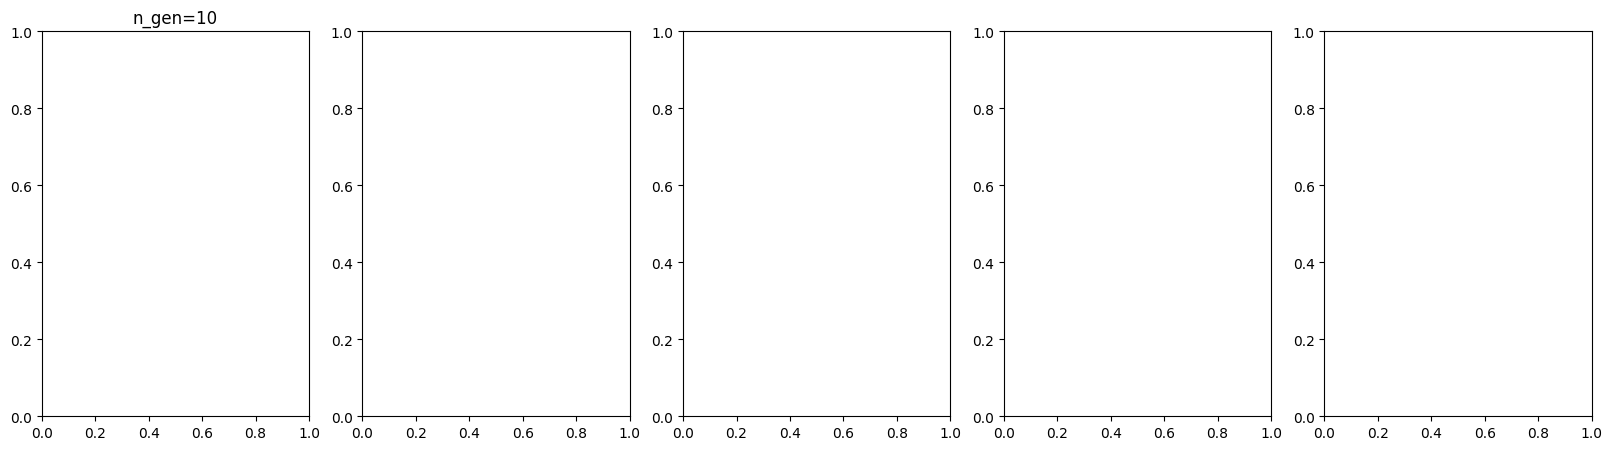

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def indices_for_sorted_order(data_list):
    # Enumerate the list and then sort by the elements, keeping track of the original indices
    sorted_indices = [index for index, value in sorted(enumerate(data_list), key=lambda x: x[1])]
    return sorted_indices

def sort_by_indices(data_list, index_list):
    # Ensure the index list is the same length as the data list
    if len(data_list) != len(index_list):
        raise ValueError("Length of index_list must be the same as length of data_list")

    # Sort the data_list according to the index_list
    sorted_list = [data_list[i] for i in index_list]
    return sorted_list

n = 2
# Load the data
df = pd.read_csv('cost.csv')  # replace with your actual file path

# Filter the data for n = 3
df_filtered = df[df['n'] == n]

# Group by n_circuit, n_gen, and d, and calculate the mean of risk and cost
grouped = df_filtered.groupby(['n_circuit', 'n_gen', 'd'])['cost'].mean().reset_index()

# Get the unique values of n_circuit and n_gen
n_circuit_values = grouped['n_circuit'].unique()
n_gen_values = grouped['n_gen'].unique()

# Plot the average risk and cost curves for each n_circuit and n_gen
fig, axs = plt.subplots(1, len(n_gen_values), figsize=(20, 5))

colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, n_circuit in enumerate(n_circuit_values):
    
    for j, n_gen in enumerate(n_gen_values):
        # Plot cost
        axs[j].set_title(f'n_gen={n_gen}')
        data = grouped[(grouped['n_circuit'] == n_circuit) & (grouped['n_gen'] == n_gen)]
        # axs[i, j].plot(data['cost'], [0]*(len(data['cost'])), label='1-Cost', linestyle = '', marker = 'o')
        
        risks = []
        # Plot risk
        for d in range(2,10):
            # read value by key json
            with open(f'risk_{n}.json') as f:
                risk_data = json.load(f)
            risk = risk_data[f'n={n},d={d},n_circuit={n_circuit},n_gen={n_gen}']
            risks.append(risk)
        x = list((data['cost'] ))
        y = list(np.mean(risks, 1))
        y = sort_by_indices(y, indices_for_sorted_order(x))
        x = sorted(x)
        for k in range(0, len(x) - 1):
            axs[j].plot([x[k],x[k + 1]], [y[k], y[k+1]], color=colors[i])
        axs[j].plot(x, y, label=f'{n_circuit} circuit', linestyle='', marker = 'o', color = colors[i])
        axs[j].set_ylim(0, 0.08)
        axs[j].set_yticks([0.02, 0.04, 0.06, 0.08])
        axs[j].set_xlim(0.4, 1)
        #axs[i, j].fill_between(data['cost'], np.asarray(y) + np.asarray(yvar), np.asarray(y) - np.asarray(yvar), alpha = 0.2, color='r')
        # axs[i, j].legend()
        # axs[i, j].set_xlabel('1 - Cost')
        axs[j].set_ylabel('Risk')
        # for k in range(0, len(x)):
        #     axs[i,j].plot([x[k],x[k]], [0,y[k]], color='black')
        # axs[j].set_yscale('log')
plt.legend()
fig.suptitle(f'Risk Curve for depth from 5 to 14, 3 qubits')
plt.tight_layout()
#plt.savefig('../images/risk_curve2.eps', format='eps')
plt.show()